## Simulating Stock prices using GBM


Simulating prices is fundamental for pricing derivatives. In the case of GBM, it is a key part of pricing equity options using Black-Scholes.

## What is Brownian motion?
Brownian motion comes from physics. It describes the random movement of particles in a substance. A Wiener process is a one-dimentional Brownian motion. It's named after Norbert Wiener who won a Nobel Prize studying one-dimentional Brownian motions.

The Wiener process features prominently in quantitative finance because of some useful mathemetical properties.

The GBM is a continuous-time stochastic process where where the log of the random variable follows the Wiener process with drift.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Since we are simulating stock prices we don't need to download data.
To simulate, we need input parameters.

In [3]:
#Setup parameters for brownian motion
s0 = 131.00
sigma = 0.25
mu = .35

#Simulation params
paths = 1000
delta = 1/252
time = 252 * 5

The first step is to build a function that returns a Wiener process. This function returns a 2-dimentional array with 1,260 rows and 1,000 columns. Each row is a day and each column is a simulation path.

In [4]:
def wiener_process(delta, sigma, time, paths):
    """Returns a Wiener process
    
    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    wiener_process : np.ndarray
    
    Notes
    -----
    This method returns a Wiener process. 
    The Wiener process is also called Brownian 
    motion. For more information about the 
    Wiener process check out the Wikipedia 
    page: http://en.wikipedia.org/wiki/Wiener_process
    """

    # return an array of samples from a normal distribution
    return sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))

In [5]:
def gbm_returns(delta, sigma, time, mu, paths):
    """Returns from a Geometric brownian motion
    
    Parameters
    ----------
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    gbm_returns : np.ndarray
    
    Notes
    -----
    This method constructs random Geometric Brownian 
    Motion (GBM).
    """
    process = wiener_process(delta, sigma, time, paths)
    return np.exp(
        process + (mu - sigma**2 / 2) * delta
    )

In [6]:
def gbm_levels(s0, delta, sigma, time, mu, paths):
    """Returns price paths starting at s0
    
    Parameters
    ----------
    s0 : float
        The starting stock price
    delta : float
        The increment to downsample sigma
    sigma : float
        Percentage volatility
    time : int
        Number of samples to create
    mu : float
        Percentage drift
    paths : int
        Number of price simulations to create
    
    Returns
    -------
    gbm_levels : np.ndarray
    """
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])
    return s0 * stacked.cumprod(axis=0)

The first example simulates 1,000 price paths over 5 years. It starts at a price of 131 with 25% annualized volatility and 35% average return per year. This is the volatility and return of Apple in 2021. :

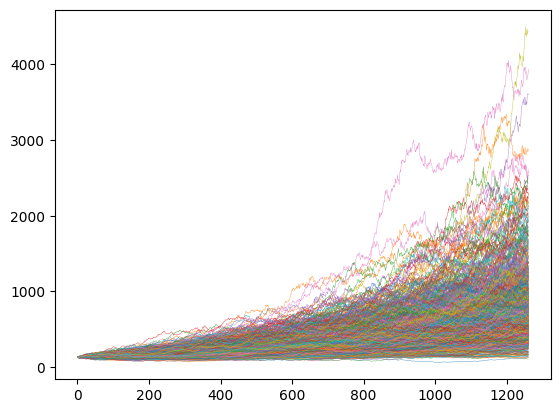

In [7]:
price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

As you might expect, a 35% drift causes most price paths to increase from from the initial price. In fact we can test exactly how many have increased from the initial price.

In [10]:
s = len(price_paths[-1, price_paths[-1, :] > s0])
print(f" {s} of the 1000 samples have increased")

 997 of the 1000 samples have increased


In second example, drift is set to 0.0

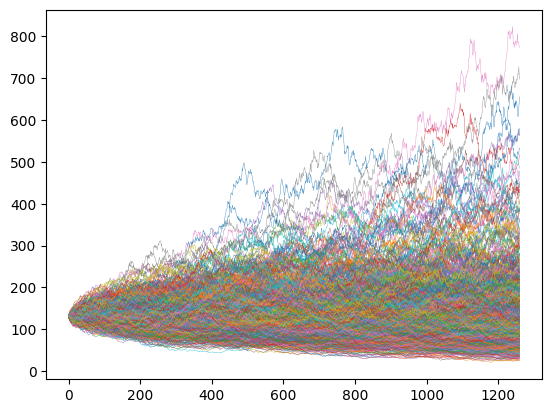

In [11]:
price_paths = gbm_levels(s0, delta, sigma, time, 0.0, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

In [12]:
s = len(price_paths[-1, price_paths[-1, :] > s0])
print(f" {s} of the 1000 samples have increased")

 364 of the 1000 samples have increased
